# Week 10 Handson

In this week, we will teach you how to implement regression model from-the-scratch. In this week, a mathematical derivation of regression will be carried in the class before hands-on. Then, you are expected to implement the final derivation formula into a python code.

#### Used Data 

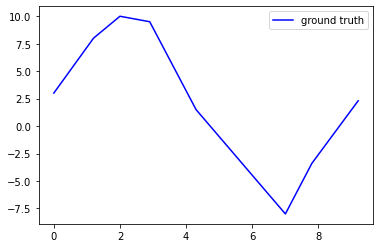

In [133]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

X =np.array([0,1.2,2,2.9,4.3,7,7.8,9.2]) # input of regression model
y = np.array([3,8,10,9.5,1.5,-8,-3.4,2.3]) # target (ground truth) 
                                           # of regression model

plt.figure("original data")
plt.plot(X,y,c='blue',label='ground truth')
plt.legend()
plt.show()

**Notes:** before you start to work on M01-M04, we want to inform that you may make usable fuctions, since they (M01-M04) are basically quite similar.

In [134]:
# x = np.array([
#     [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#     [80,93,100,82,90,99,81,96,94,93,97,95,100,85,85,87],
#     [8,9,10,12,11,8,8,10,12,11,13,11,8,12,9,12]
# ]).T
# y = np.array([2256,2340,2426,2293,2330,2368,2368,2250,2409,2364,2440,2364,2404,2317,2309,2328]).reshape(-1,1)
display(X.shape)
display(y.shape)

(8,)

(8,)

## Milestone (M01)
a. Make a linear regression model, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M01.a.<br>
c. Plot prediction output you get in M01.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [135]:
# write code for M01.a here
def preprocess(x,y):
    x_ = x.reshape(-1,1).tolist() # so we can append
    # add bias:
    for i in range(len(x_)):
        x_[i].insert(0,1)
    return np.array(x_), y.reshape(-1,1)
    
def find_regression_coeff(X,y):
    # calculate the a
    XTX = np.matmul(X.T, X)
    # print(XTX)
    XTy = np.matmul(X.T, y)
    # print(XTy)
    a = np.matmul(np.linalg.inv(XTX),XTy)
    # print(a)
    return a
#     return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T), y)

X_,y_ = preprocess(X,y)
a = find_regression_coeff(X_,y_)
print(a)
# final shapes:
display(a.shape)
display(X_.shape)

[[ 8.10697402]
 [-1.21964512]]


(2, 1)

(8, 2)

In [136]:
# write code for M01.b here
def regression_predict(X,a):
    return np.matmul(X,a)

X_pred = regression_predict(X_,a)
print(X_pred)

[[ 8.10697402]
 [ 6.64339987]
 [ 5.66768378]
 [ 4.57000317]
 [ 2.8625    ]
 [-0.43054183]
 [-1.40625792]
 [-3.11376109]]


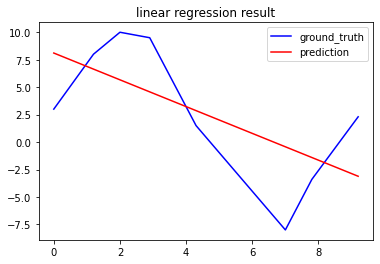

In [137]:
# write code for M01.c here
def plot_regression_result(title, prediction, ground_truth):
    plt.figure("regression_result")
    plt.plot(X,ground_truth,c='blue',label='ground truth')
    plt.plot(X,prediction,c='red',label='prediction')
    plt.title(title)
    plt.legend(['ground_truth','prediction'], loc='upper right')
    plt.show()
    
plot_regression_result('linear regression result', X_pred, y)

Compare with sklearn's result:

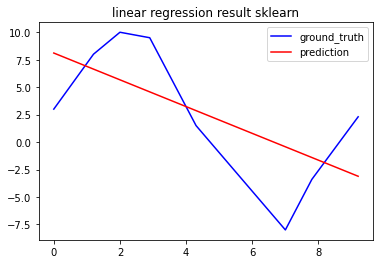

In [138]:
from sklearn.linear_model import LinearRegression
X_,y_ = preprocess(X,y)
lin_reg = LinearRegression()
lin_reg.fit(X_, y_)
X_pred_ = lin_reg.predict(X_)
plot_regression_result('linear regression result sklearn', X_pred_, y)

## M02 (same with M01, but 2nd order polynomial)
a. Make a polynomial regression model with $order=2$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M02.a.<br>
c. Plot prediction output you get in M02.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [139]:
# write code for M02.a here
def polynomial_preprocess(X, degree):
    X_ = X.tolist() # so we can append
    for i in range(len(X_)):
        for j in range(2,degree+1):
            X_[i].append(X_[i][1] ** j)
    return np.array(X_)

X_,y_ = preprocess(X,y)
X_ = polynomial_preprocess(X_,2)
print(X_)
            
# calculate a
a = find_regression_coeff(X_, y_)
display(a)

[[ 1.    0.    0.  ]
 [ 1.    1.2   1.44]
 [ 1.    2.    4.  ]
 [ 1.    2.9   8.41]
 [ 1.    4.3  18.49]
 [ 1.    7.   49.  ]
 [ 1.    7.8  60.84]
 [ 1.    9.2  84.64]]


array([[ 8.14981621e+00],
       [-1.25379507e+00],
       [ 3.66819831e-03]])

In [140]:
# write code for M02.b here
def polynomial_regression_predict(X,a):
    return np.matmul(X,a)

X_pred = polynomial_regression_predict(X_,a)
print(X_pred)

[[ 8.14981621]
 [ 6.65054433]
 [ 5.65689886]
 [ 4.54466005]
 [ 2.82632239]
 [-0.44700757]
 [-1.40661215]
 [-3.07462213]]


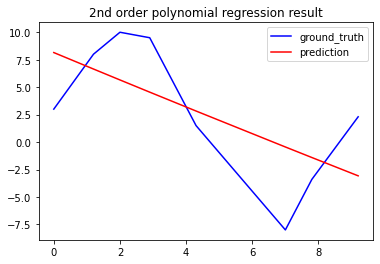

In [141]:
# write code for M02.c here
plot_regression_result('2nd order polynomial regression result', X_pred, y)

Compare with sklearn's result

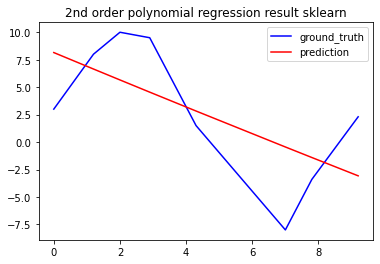

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_,y_ = preprocess(X,y)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_)
X_pred_ = pol_reg.predict(X_poly)

plot_regression_result('2nd order polynomial regression result sklearn', X_pred_, y)

## M03 (same with Q02, but 4th order polynomial)
a. Make a polynomial regression model with $order=4$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M03.a.<br>
c. Plot prediction output you get in M03.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [143]:
# write code for Q03.a here
X_,y_ = preprocess(X,y)
X_ = polynomial_preprocess(X_,4)
print(X_)
            
# calculate a
a = find_regression_coeff(X_, y_)
display(a)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.2000000e+00 1.4400000e+00 1.7280000e+00 2.0736000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.6000000e+01]
 [1.0000000e+00 2.9000000e+00 8.4100000e+00 2.4389000e+01 7.0728100e+01]
 [1.0000000e+00 4.3000000e+00 1.8490000e+01 7.9507000e+01 3.4188010e+02]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03]
 [1.0000000e+00 7.8000000e+00 6.0840000e+01 4.7455200e+02 3.7015056e+03]
 [1.0000000e+00 9.2000000e+00 8.4640000e+01 7.7868800e+02 7.1639296e+03]]


array([[ 2.54367257e+00],
       [ 9.43468387e+00],
       [-3.49267218e+00],
       [ 3.19584309e-01],
       [-5.56615726e-03]])

In [144]:
# write code for Q03.b here
X_pred = polynomial_regression_predict(X_,a)
print(X_pred)

[[ 2.54367257]
 [ 9.37654498]
 [ 9.90996756]
 [ 7.93154077]
 [ 2.03953591]
 [-6.30140265]
 [-5.30375782]
 [ 2.70389867]]


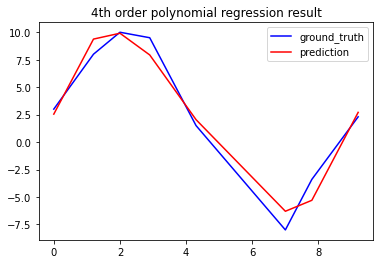

In [145]:
# write code for Q03.c here
plot_regression_result('4th order polynomial regression result', X_pred, y)

Compare with sklearn's result

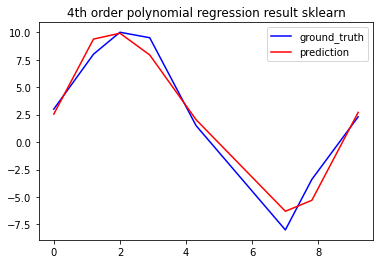

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_,y_ = preprocess(X,y)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_)
X_pred_ = pol_reg.predict(X_poly)

plot_regression_result('4th order polynomial regression result sklearn', X_pred_, y)

## M04 (same with M03, but with regularization)
a. Make a **regularized** polynomial regression model with $order=4$ and regularization constant $\lambda=0.5$ (find the regression coefficient $\mathbf{a}$).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M04.a.<br>
c. Plot prediction output you get in M04.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and grount truth)

In [152]:
# write code for Q04.a here
def find_regression_coeff_with_regularization(X,y, lambda_, order):
    # calculate the a
    XTX = np.matmul(X.T, X)
    XTXlambdaI = np.add(XTX,  (lambda_ * np.identity(order+1)))
    # print(XTX)
    XTXlambdaIXT = np.matmul(np.linalg.inv(XTXlambdaI),X.T)
    # print(XTy)
    a = np.matmul(XTXlambdaIXT,y)
    # print(a)
    return a

X_,y_ = preprocess(X,y)
X_ = polynomial_preprocess(X_,4)
a= find_regression_coeff_with_regularization(X_, y_, 0.5, 4)
display(a)

array([[ 3.45119858],
       [ 4.36414443],
       [-0.77210706],
       [-0.13017814],
       [ 0.01760622]])

In [153]:
# write code for Q04.b here
X_pred_ = polynomial_regression_predict(X_,a)
display(X_pred)

array([[ 3.45119858],
       [ 7.38789818],
       [ 8.33133367],
       [ 7.6841371 ],
       [ 3.60990382],
       [-6.21159923],
       [-6.09023584],
       [ 3.01176443]])

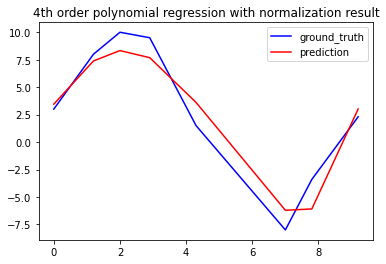

In [150]:
# write code for Q04.c here
plot_regression_result('4th order polynomial regression with normalization result', X_pred, y)